In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [5]:
df.rename(columns={df.columns[0]: 'X', df.columns[1]: 'Y', df.columns[2]:'class'}, inplace=True)
df = df.astype(float).round(2)
df.head()

,X,Y,class
0,2.12,-0.05,1.0
1,0.88,-0.08,0.0
2,-0.06,-0.04,1.0
3,0.83,-0.54,1.0
4,2.11,0.66,1.0


In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

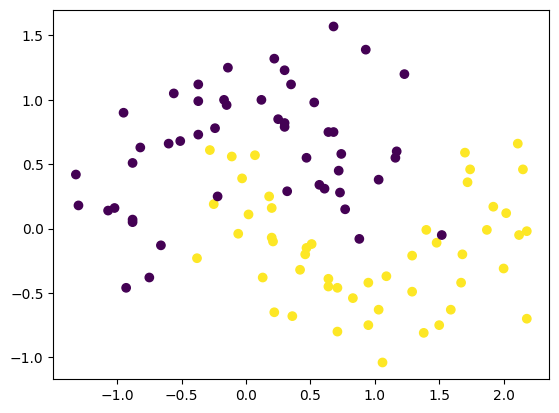

In [7]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [8]:
y

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.])

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.4812 - loss: 0.8506 - val_accuracy: 0.5000 - val_loss: 0.8361
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4939 - loss: 0.8290 - val_accuracy: 0.5000 - val_loss: 0.8029
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5294 - loss: 0.8015 - val_accuracy: 0.5000 - val_loss: 0.7727
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5875 - loss: 0.7624 - val_accuracy: 0.5500 - val_loss: 0.7454
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6719 - loss: 0.7093 - val_accuracy: 0.6000 - val_loss: 0.7203
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6118 - loss: 0.7123 - val_accuracy: 0.6000 - val_loss: 0.6965
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6558 - loss: 0.6956 - val_accuracy: 0.6000 - val_loss: 0.6751
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6699 - loss: 0.6813 - val_accuracy: 0.7000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

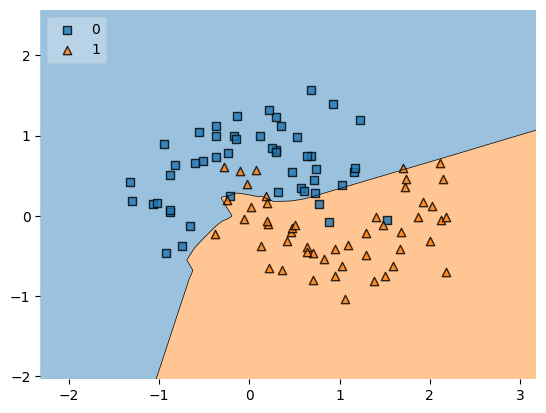

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

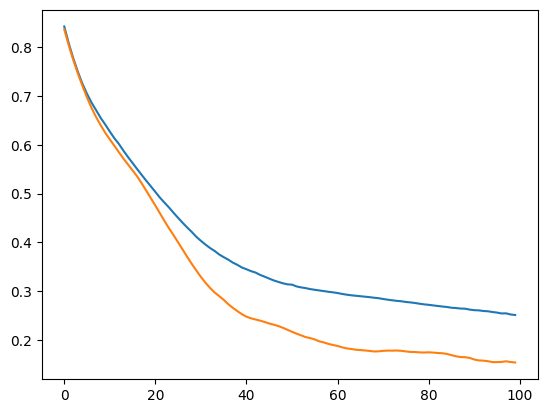

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()